In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
df1_oxdi=pd.read_csv('Oxid_000.csv')
df1_oxdi.head()

Ox_Chamber    process type    Temp_OXid Vapor    ppm  Pressure  Oxid_time  \
0           1  Oxidation  dry  1138.979159    O2  32.80     0.200         62   
1           1  Oxidation  dry  1218.184551    O2  31.86     0.194        137   
2           1  Oxidation  dry  1062.467808    O2  39.51     0.217        128   
3           1  Oxidation  dry  1114.704773    O2  32.88     0.201         90   
4           1  Oxidation  dry   989.411946    O2  38.11     0.204         98   

   thickness    No_Die  Lot_Num  Wafer_Num               Datetime  
0    699.443  NOLSM111        1          1  17-02-2019 PM 9:04:30  
1    696.792  NOLSM212        1          2  17-02-2019 PM 9:04:30  
2    705.471  NOLSM313        1          3  17-02-2019 PM 9:04:30  
3    710.772  NOLSM414        1          4  17-02-2019 PM 9:04:30  
4    716.975  NOLSM515        1          5  17-02-2019 PM 9:04:30

In [4]:
import os

In [8]:
path=os.getcwd()
file_list=os.listdir(path)
file_list

['.ipynb_checkpoints',
 'chapter 2-1.ipynb',
 'chapter 2-2.ipynb',
 'chapter 2-3.ipynb',
 'chapter 2-4.ipynb',
 'chapter 2-5.ipynb',
 'Etching_000.csv',
 'Implant_000.csv',
 'Inspect_000.csv',
 'live_coding.ipynb',
 'Oxid_000.csv',
 'Photo_lithography_000.csv',
 'Photo_Softbake_000.csv']

In [ ]:
for i in file_list:
    if 'csv' in i:
        print(i)

- 데이터 구조 : 데이터의 개수 / 항목
- 데이터 타입 : 각 항목의 데이터 타입 (연속 / 범주)
- 기술통계량  : 
    - 연속형 : 대표값 / 산포 / 분포의 모양
        - 대표값 : 평균 / 중앙값 -> 이상치를 확인
        - 산포 : 표준편차 / 최소값 / 최대값 -> 데이터 신뢰성 
        - 분포의 모양 : 정규 분포 여부
        - 결측치 (Missing Value) 확인
    - 범주형 : 각 항목의 빈도수 / 결측치 (Missing Value) 확인

In [15]:
df1_oxdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ox_Chamber  852 non-null    int64  
 1   process     852 non-null    object 
 2   type        852 non-null    object 
 3   Temp_OXid   852 non-null    float64
 4   Vapor       852 non-null    object 
 5   ppm         852 non-null    float64
 6   Pressure    852 non-null    float64
 7   Oxid_time   852 non-null    int64  
 8   thickness   852 non-null    float64
 9   No_Die      852 non-null    object 
 10  Lot_Num     852 non-null    int64  
 11  Wafer_Num   852 non-null    int64  
 12  Datetime    852 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 86.7+ KB


In [13]:
# 평균값이랑 중앙값이랑 크게 차이나는 요소를 찾자
# 고유값 넘버는 제외하고 temp ~ thickness 정도 살펴보자
df1_oxdi.describe()

Ox_Chamber    Temp_OXid         ppm    Pressure   Oxid_time  \
count   852.00000   852.000000  852.000000  852.000000  852.000000   
mean      2.00000  1064.415784   33.202242    0.211374  123.201878   
std       0.81265   149.550147    8.494070    0.009067   76.285130   
min       1.00000   862.011276   21.070000    0.180000   -6.000000   
25%       1.00000   874.756813   22.450000    0.205000   52.000000   
50%       2.00000  1069.240209   33.420000    0.213000  116.000000   
75%       3.00000  1189.172249   40.452500    0.217000  217.000000   
max       3.00000  1339.476675   49.910000    0.229000  291.000000   

        thickness     Lot_Num   Wafer_Num  
count  852.000000  852.000000  852.000000  
mean   710.926810   16.281690   13.894366  
std      8.082856    9.116841    7.785951  
min    681.435000    1.000000    1.000000  
25%    706.313000    8.000000    7.000000  
50%    711.590500   16.000000   14.000000  
75%    715.595000   24.000000   21.000000  
max    737.402000   32.000000   27.000000

<AxesSubplot:xlabel='Temp_OXid', ylabel='Count'>

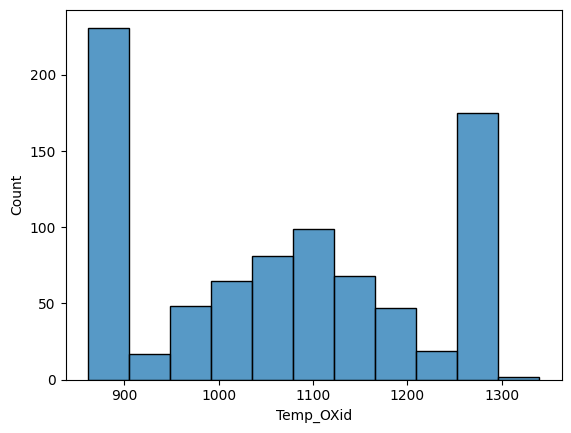

In [18]:
sns.histplot(data=df1_oxdi, x='Temp_OXid') # QC7 중 히스토그램

<AxesSubplot:xlabel='Temp_OXid', ylabel='Count'>

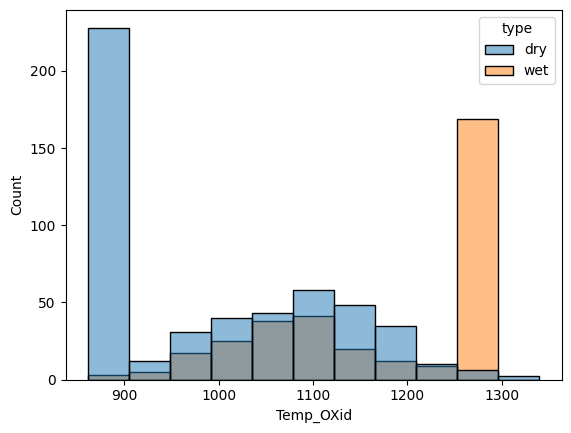

In [20]:
sns.histplot(data=df1_oxdi, x='Temp_OXid', hue='type') # QC7 중 층별화

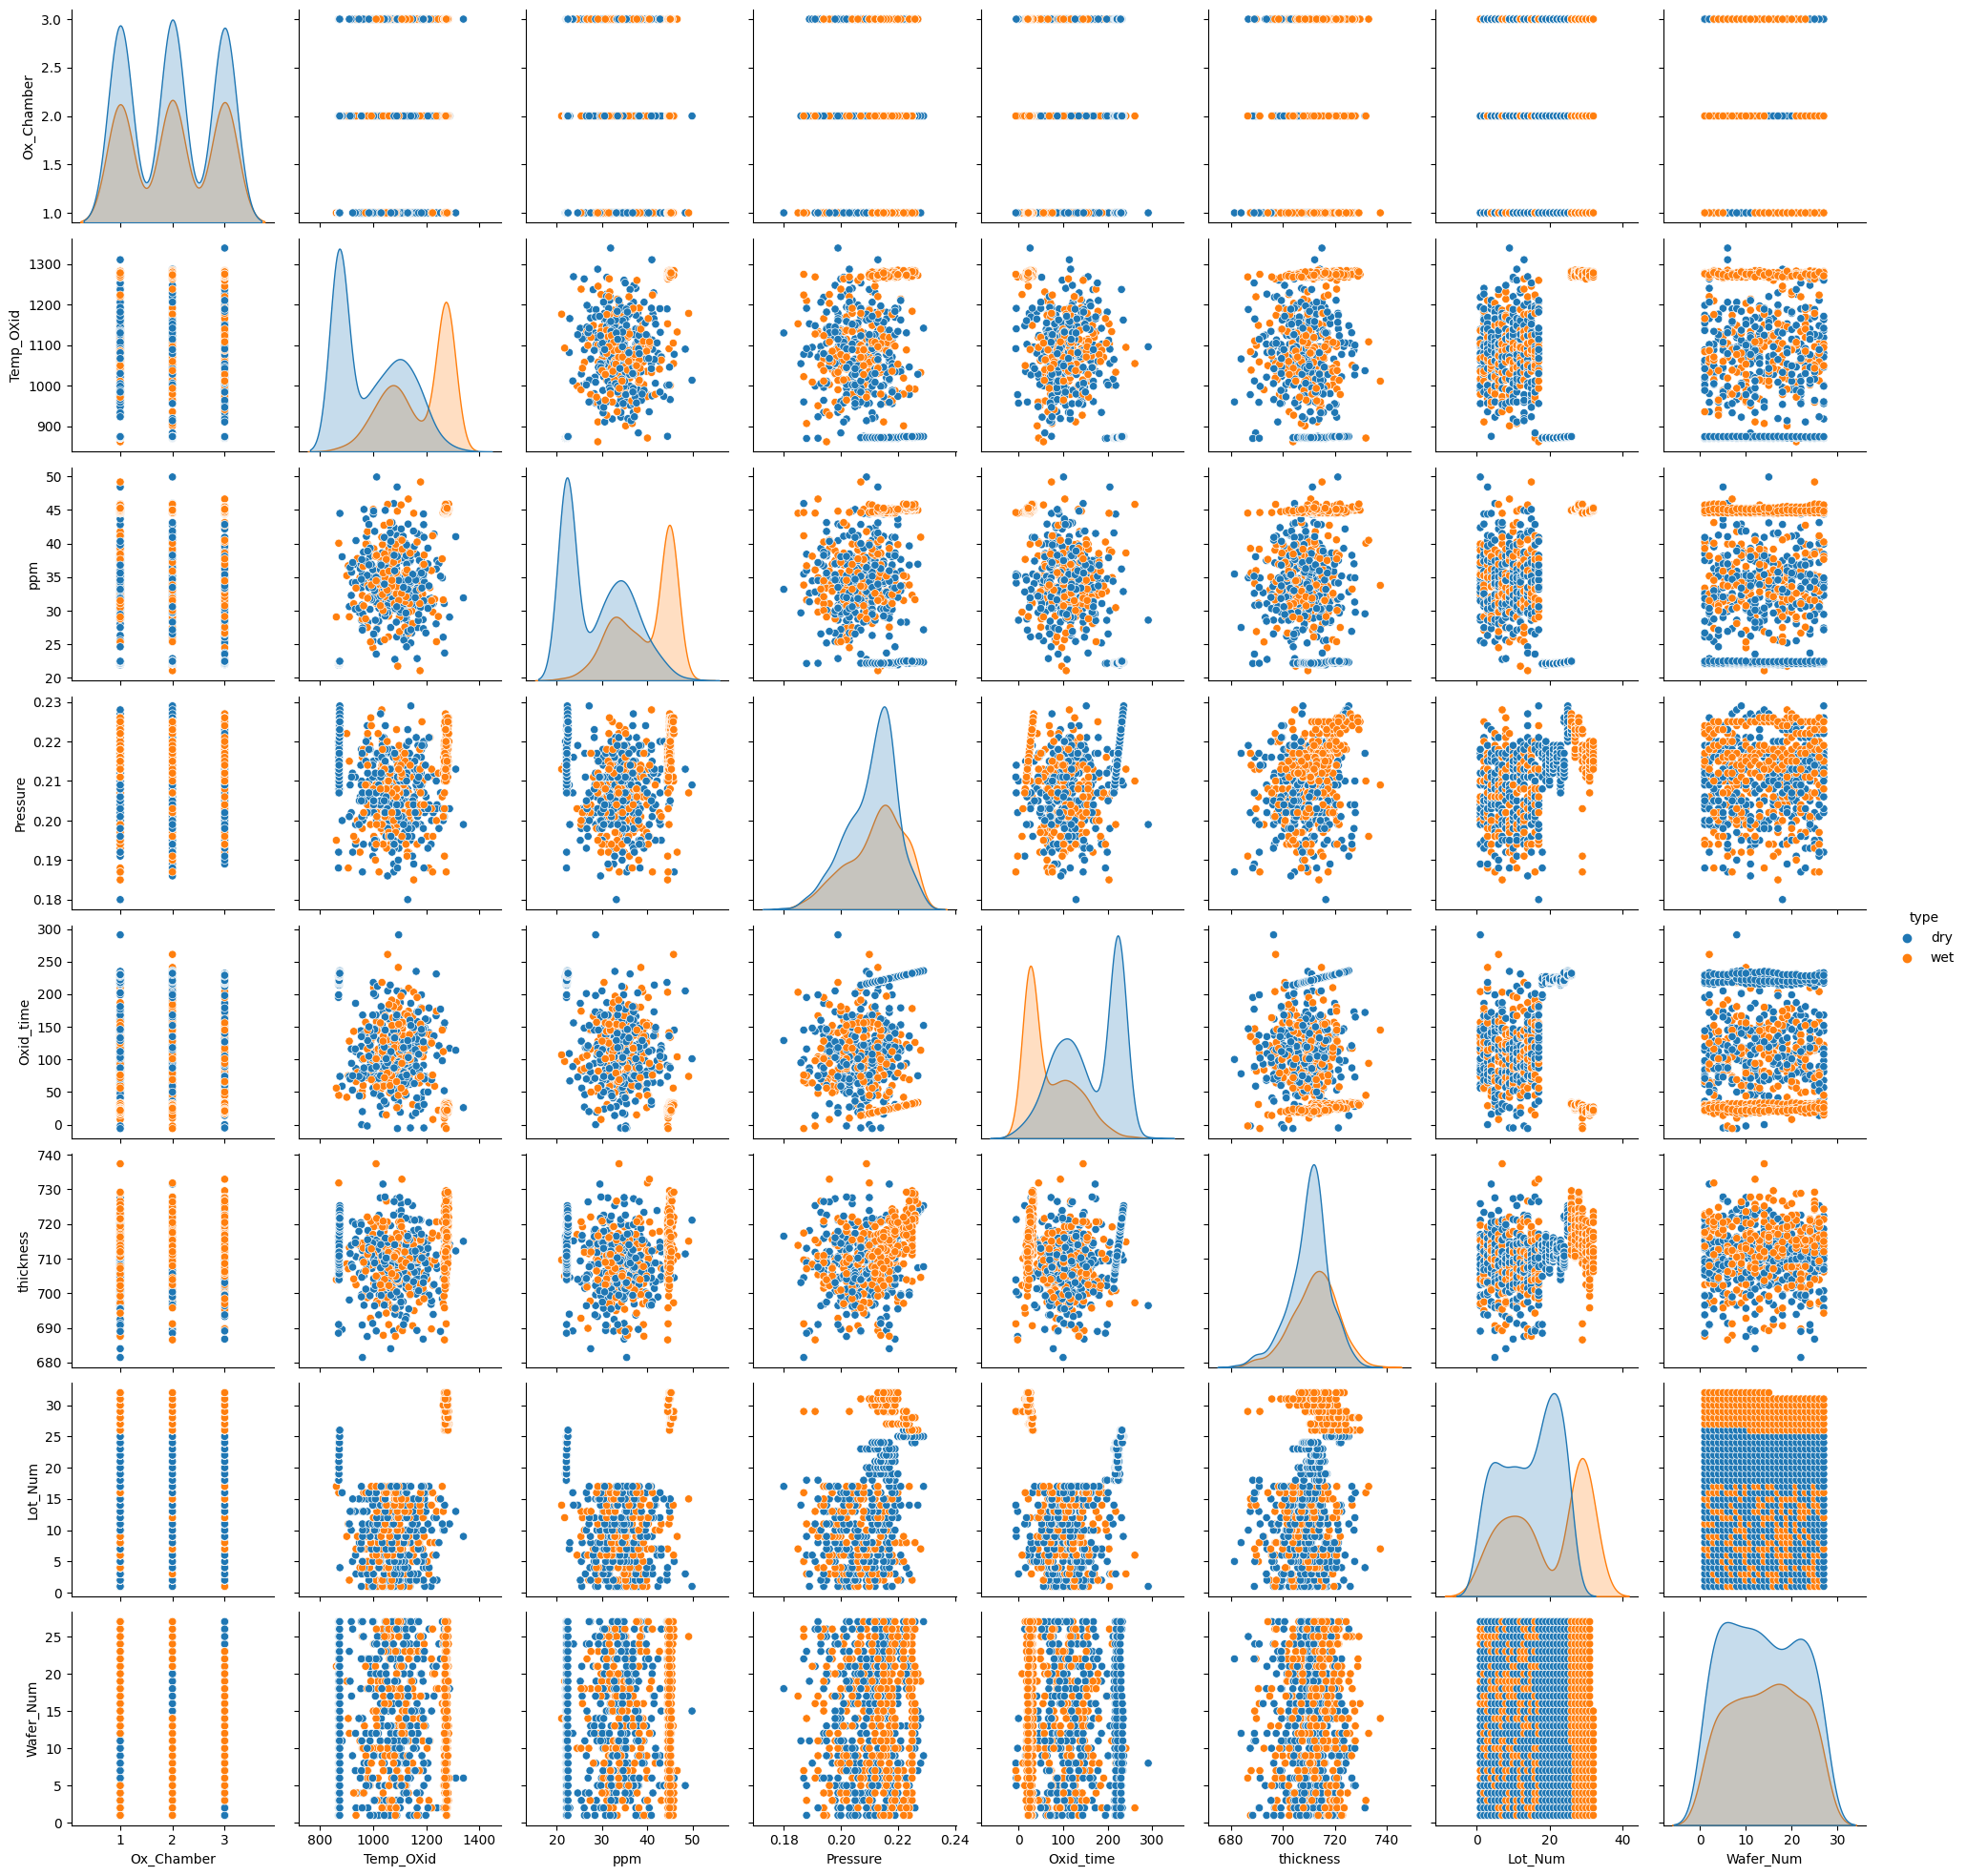

In [21]:
sns.pairplot(data=df1_oxdi, hue='type')

In [22]:
df1_oxdi['type'].value_counts()

dry    513
wet    339
Name: type, dtype: int64

<AxesSubplot:xlabel='Ox_Chamber', ylabel='count'>

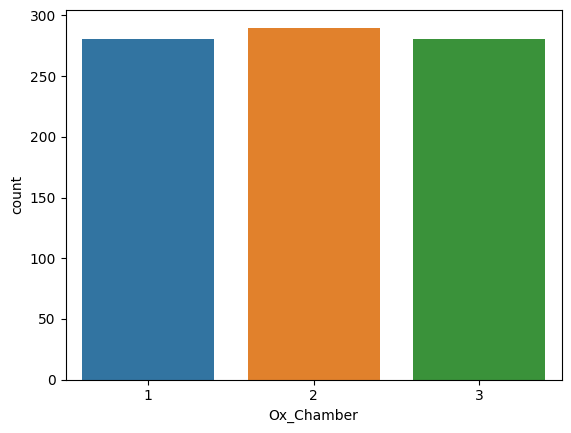

In [23]:
# 범주형에서는 countplot
sns.countplot(data=df1_oxdi, x='Ox_Chamber')

In [25]:
# 결측치 확인
df1_oxdi.isnull().sum()

Ox_Chamber    0
process       0
type          0
Temp_OXid     0
Vapor         0
ppm           0
Pressure      0
Oxid_time     0
thickness     0
No_Die        0
Lot_Num       0
Wafer_Num     0
Datetime      0
dtype: int64

In [34]:
'''
Mission
1. "Etching_000.csv" 데이터 파일을 열어서, 해당 데이터 파일의 기술통계량을 확인하고, sns.pairplot 함수를 이용해 숫자데이터의 분포를 파일형태로 저장해 보세요!
2. "Inspect_000.csv" 데이터 파일을 열어서, "Error_message" 범주형 항목을 sns.countplot 함수를 이용해 막대그래프로 그리고, 파일 형태로 저장해 보세요!
'''

df_etc=pd.read_csv('Etching_000.csv')
df_ins=pd.read_csv('Inspect_000.csv')

In [30]:
df_etc.head()

Unnamed: 0  Etching_Chamber Process 3  Temp_Etching  Source_Power  \
0           0                3   Etching        70.878        50.851   
1           1                2   Etching        69.561        52.283   
2           2                1   Etching        70.968        51.610   
3           3                1   Etching        70.146        51.286   
4           4                2   Etching        71.174        51.996   

   Selectivity    No_Die  Lot_Num  Wafer_Num               Datetime  \
0        1.047  NOLSM111        1          1  17-02-2019 PM 9:04:30   
1        1.051  NOLSM212        1          2  17-02-2019 PM 9:04:30   
2        1.017  NOLSM313        1          3  17-02-2019 PM 9:04:30   
3        1.027  NOLSM414        1          4  17-02-2019 PM 9:04:30   
4        1.050  NOLSM515        1          5  17-02-2019 PM 9:04:30   

   Thin Film 4  Thin Film 3  Thin Film 2  Thin Film 1  
0        251.0       267.06       303.82       361.38  
1        317.0       332.74       369.31       426.11  
2        411.0       424.21       460.65       517.80  
3        256.0       272.28       308.56       365.93  
4        419.0       434.98       471.65       528.85

In [31]:
df_ins.head()

Target    No_Die  Lot_Num  Wafer_Num    Datetime Error_message  \
0      96  NOLSM111        1          1  02-18-2018          none   
1     102  NOLSM212        1          2  02-18-2018          none   
2      95  NOLSM313        1          3  02-18-2018          none   
3     117  NOLSM414        1          4  02-18-2018          none   
4     143  NOLSM515        1          5  02-18-2018          none   

                                           Wafer_map  
0  [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...  
1  [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...  
2  [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...  
3  [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...  
4  [[0 0 0 ... 0 0 0]\n [0 0 0 ... 0 0 0]\n [0 0 ...

In [27]:
df_etc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       852 non-null    int64  
 1   Etching_Chamber  852 non-null    int64  
 2   Process 3        852 non-null    object 
 3   Temp_Etching     852 non-null    float64
 4   Source_Power     852 non-null    float64
 5   Selectivity      852 non-null    float64
 6   No_Die           852 non-null    object 
 7   Lot_Num          852 non-null    int64  
 8   Wafer_Num        852 non-null    int64  
 9   Datetime         852 non-null    object 
 10  Thin Film 4      851 non-null    float64
 11  Thin Film 3      851 non-null    float64
 12  Thin Film 2      851 non-null    float64
 13  Thin Film 1      851 non-null    float64
dtypes: float64(7), int64(4), object(3)
memory usage: 93.3+ KB


In [28]:
df_etc.describe()

Unnamed: 0  Etching_Chamber  Temp_Etching  Source_Power  Selectivity  \
count   852.00000       852.000000    852.000000    852.000000   852.000000   
mean    425.50000         1.967136     71.147822     51.227459     1.032140   
std     246.09551         0.830584      0.824158      0.634215     0.016238   
min       0.00000         1.000000     68.150000     49.342000     0.984000   
25%     212.75000         1.000000     70.709750     50.794500     1.022000   
50%     425.50000         2.000000     71.220500     51.247000     1.033500   
75%     638.25000         3.000000     71.656500     51.698250     1.043000   
max     851.00000         3.000000     73.081000     53.272000     1.076000   

          Lot_Num   Wafer_Num  Thin Film 4  Thin Film 3  Thin Film 2  \
count  852.000000  852.000000   851.000000   851.000000   851.000000   
mean    16.281690   13.894366   296.633373   311.276439   347.799401   
std      9.116841    7.785951   125.378446   125.714630   125.774630   
min      1.000000    1.000000   -49.000000   -34.650000     2.000000   
25%      8.000000    7.000000   202.000000   216.525000   252.880000   
50%     16.000000   14.000000   281.000000   295.970000   332.480000   
75%     24.000000   21.000000   372.000000   386.675000   423.050000   
max     32.000000   27.000000   687.000000   700.240000   736.510000   

       Thin Film 1  
count   851.000000  
mean    404.940012  
std     125.790535  
min      59.380000  
25%     310.185000  
50%     389.630000  
75%     480.355000  
max     793.500000

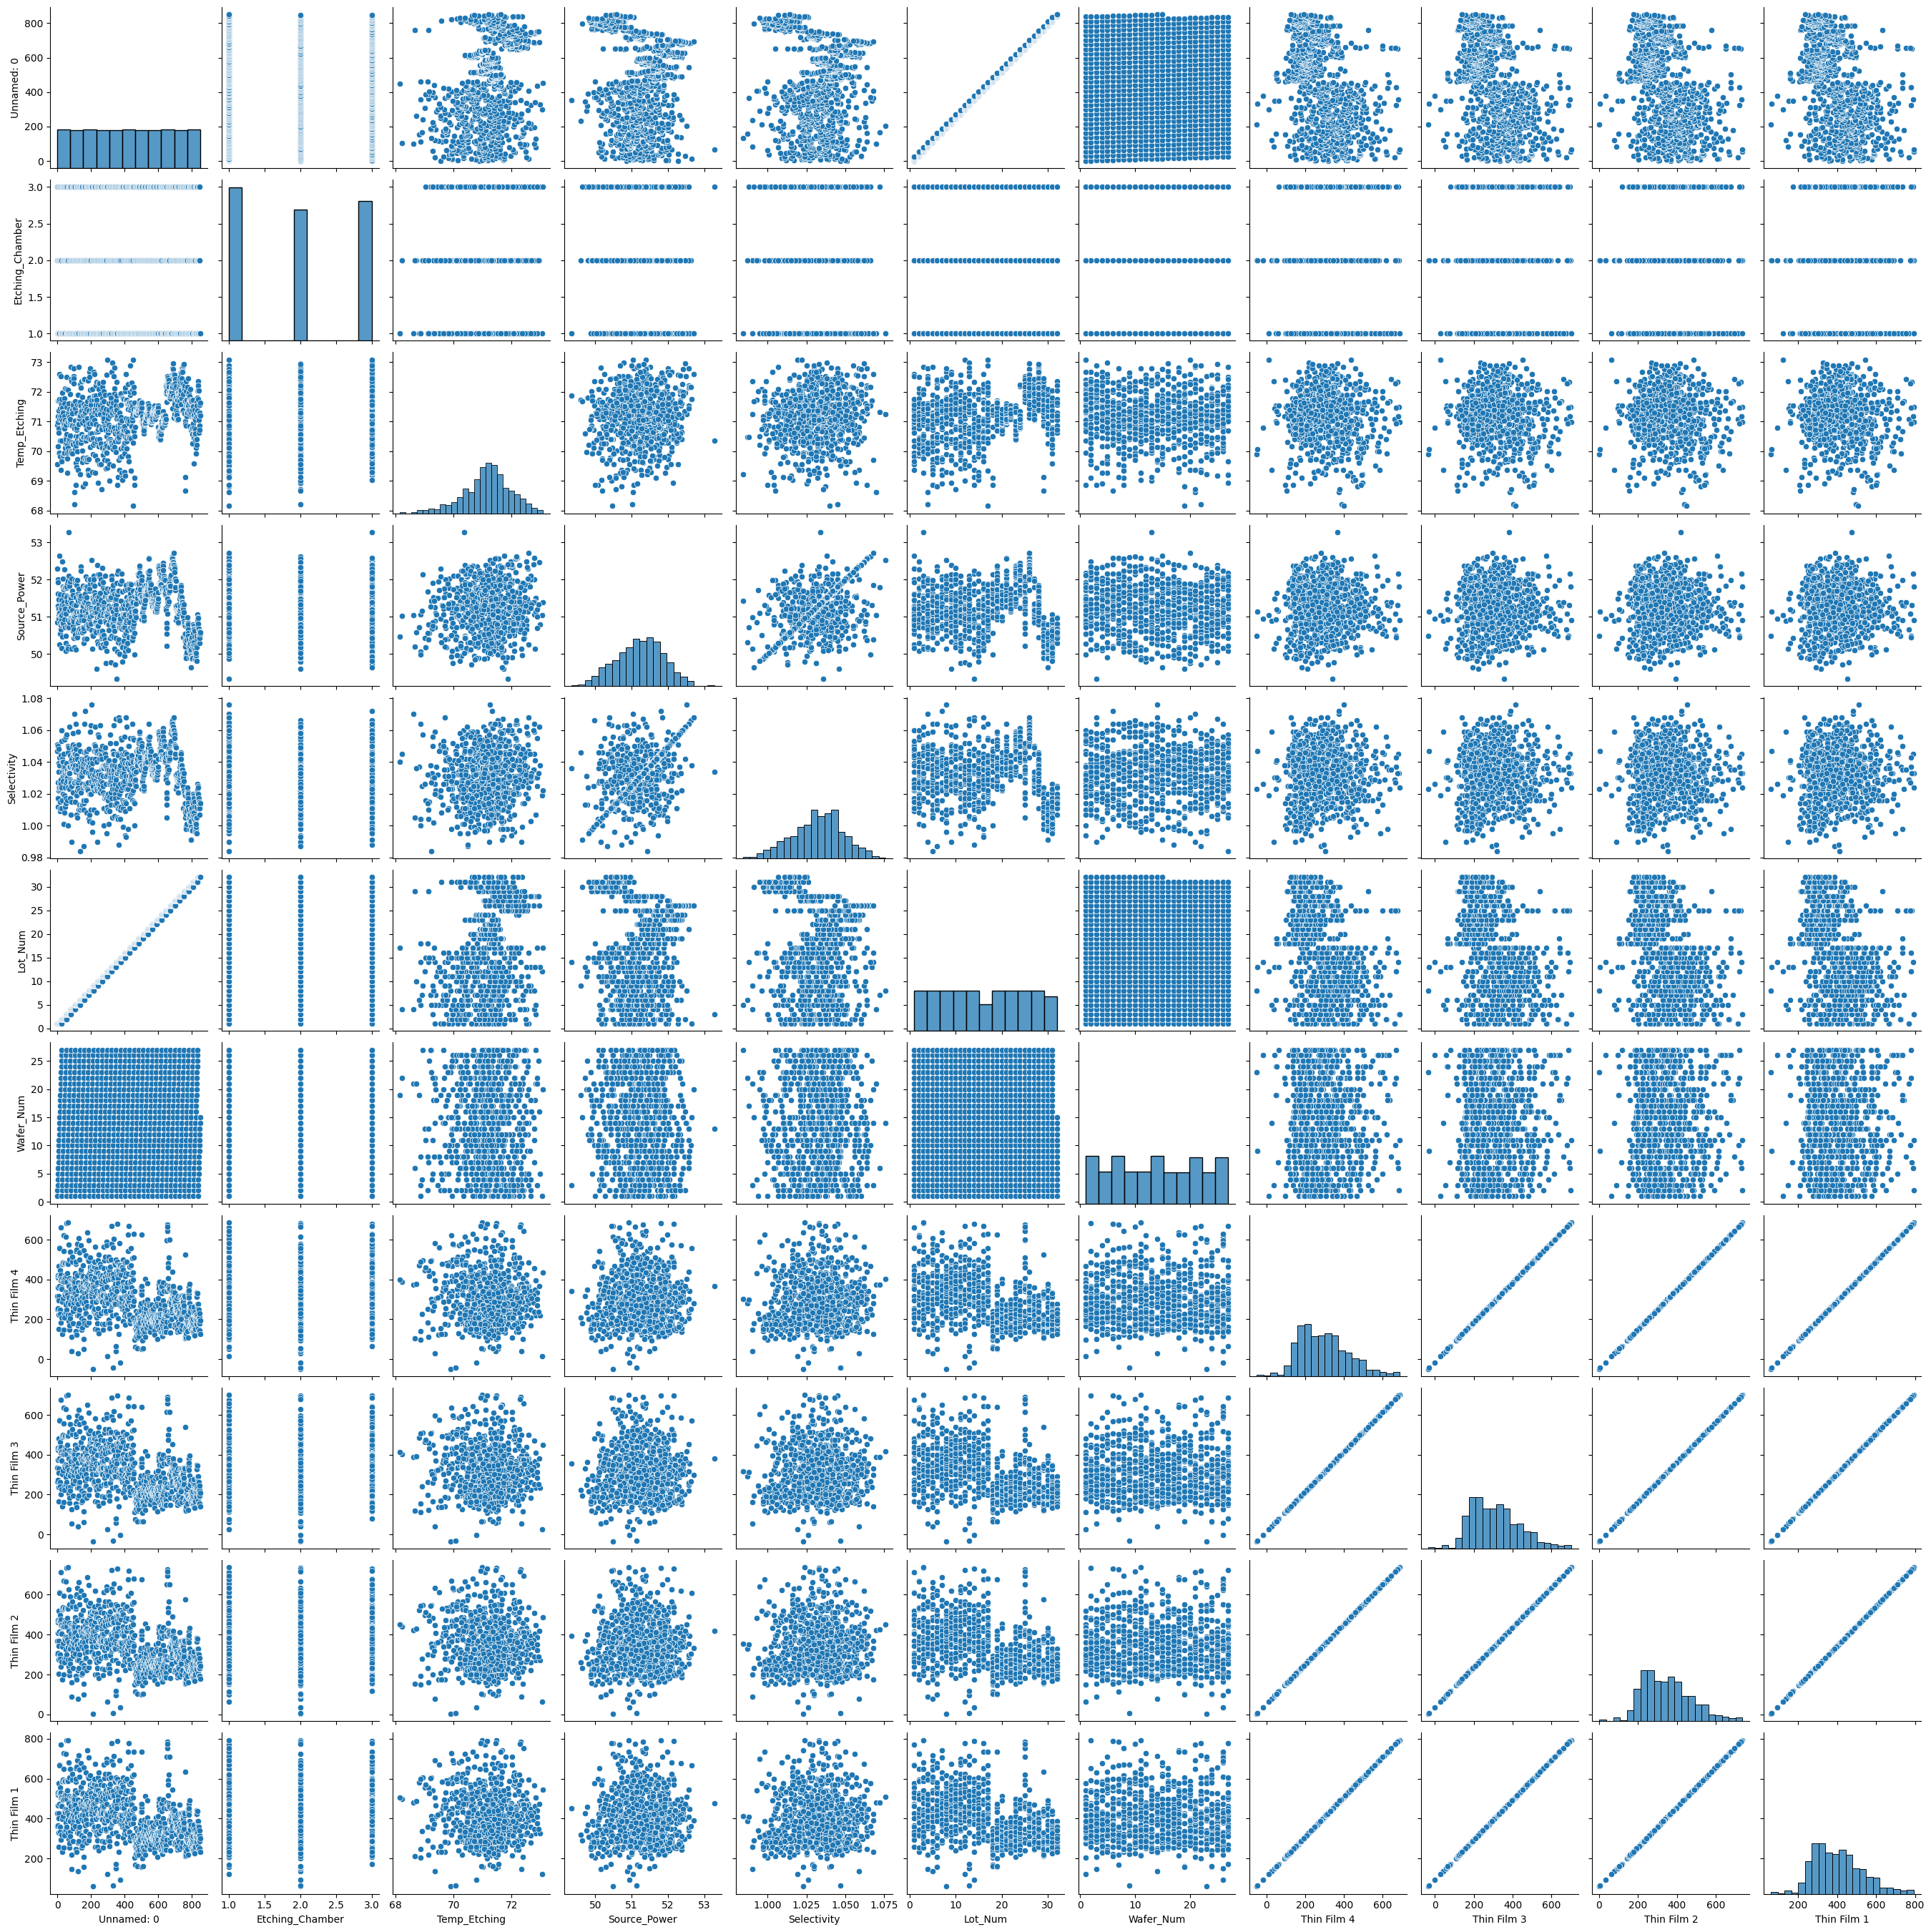

In [32]:
sns.pairplot(df_etc)

<AxesSubplot:xlabel='Error_message', ylabel='count'>

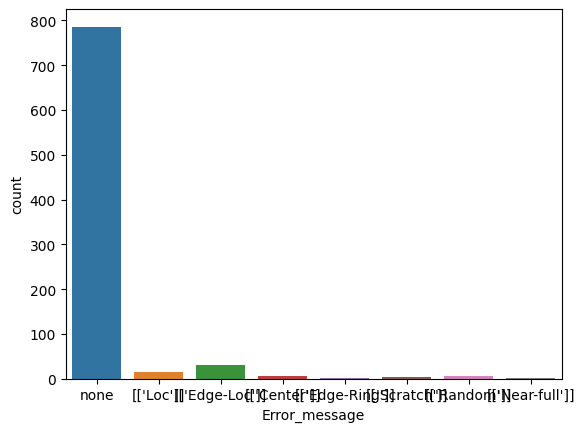

In [33]:
sns.countplot(df_ins,x='Error_message')